# Лабораторная работа 4
# 10 группа ММАД, 5 вариант
# Квиткевич Александр

# Методом Монте-Карло вычислить интегралы:
### Integral 1:

\begin{equation}
\int_{-\infty}^{+\infty} \frac{1}{x^4 + 3x^2 + 17}dx = \sqrt \frac{2\sqrt{17} -3}{1003} \pi = 0.22720731660283678
\\
\int_{-\infty}^{+\infty} \frac{1}{x^4 + 3x^2 + 17}dx = 2\int_{0}^{+\infty} \frac{1}{x^4 + 3x^2 + 17}dx \approx 2\int_{0}^{100} \frac{1}{x^4 + 3x^2 + 17}dx
\end{equation}

  

### Integral 2:
\begin{equation}
\iint\limits_{|x|+|y| < 3} (xy^2+1)sin(x) dxdy = 2 * [ {\int_{-3}^{0}dx\int_{0}^{x+3}(xy^2+1)sin(x)dy + \int_{0}^{3}dx\int_{0}^{3-x}(xy^2+1)sin(x)dy} ] = 2 * [(13 + 5sin(3) + 8cos(3)) + (7 + 7sin(3) + 8cos(3))] = 40 + 24sin(3) + 32cos(3) = 11.707120302222556
\end{equation}

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from utils.monte_carlo import (
    calculate_I1,
    calculate_I2,
    calculate_integrals_for_Ns,
    f2,
    plot_error_graph,
)


Ns = [100, 1000, 10000, 100000, 1000000, 10000000]

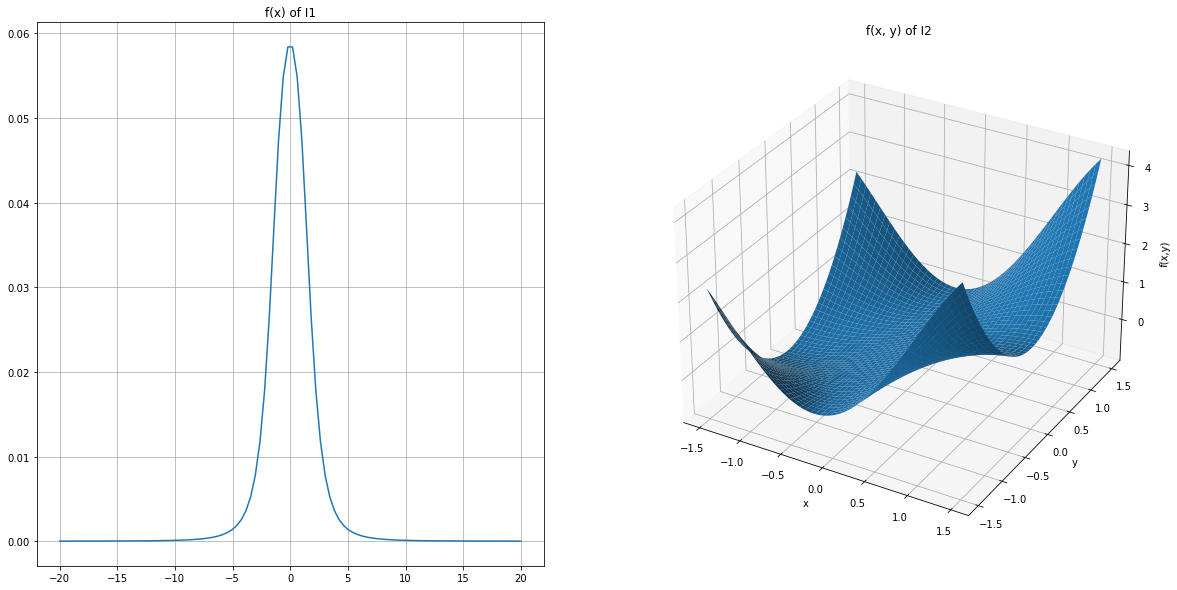

In [2]:
fig = plt.figure(figsize=(20, 10))

# First subplot
ax = fig.add_subplot(1, 2, 1)

x1 = np.linspace(-20, 20, 100)
y1 = 1 / (x1 ** 4 + 3 * x1 ** 2 + 17)

ax.plot(x1, y1)
ax.grid(True)
ax.set_title("f(x) of I1")


# Second subplot
ax = fig.add_subplot(1, 2, 2, projection="3d")

x2 = np.linspace(-3, 3, 100)
y2 = np.linspace(-3, 3, 100)
mask = np.abs(x2) + np.abs(y2) <= 3
x2, y2 = np.meshgrid(x2[mask], y2[mask])
f = f2(x2, y2)

ax.plot_surface(x2, y2, f)
ax.set_title("f(x, y) of I2")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")

plt.show()

I1 value with N=10000000: 0.2272268319275121
I2 value with N=10000000: 11.701986459065305


<AxesSubplot:title={'center':'Error on I2'}>

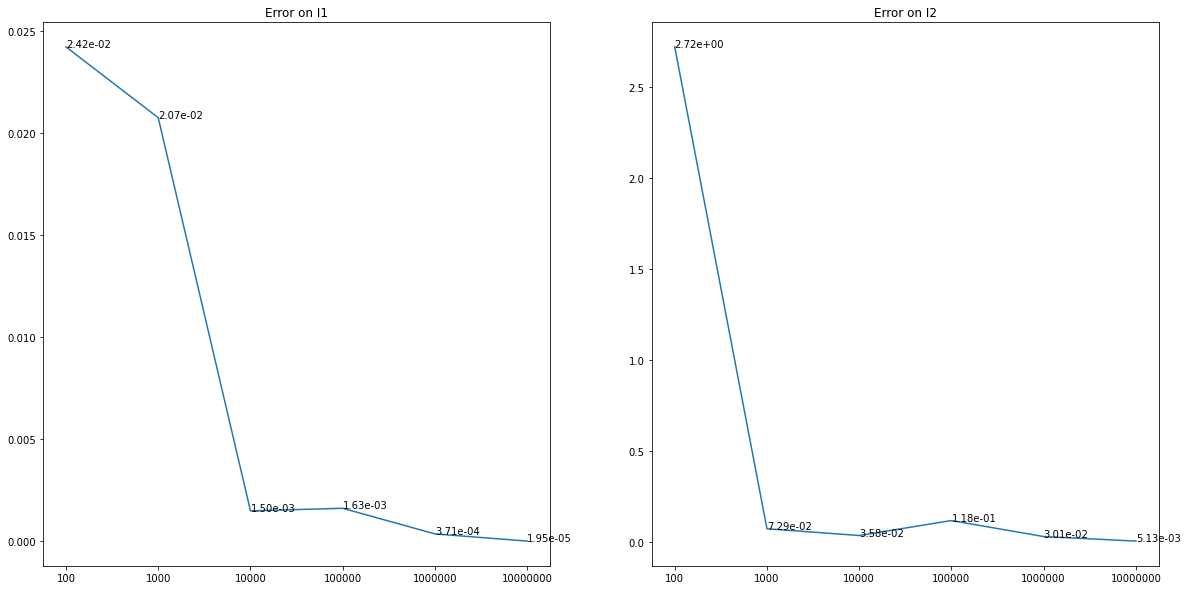

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
plot_xticks = range(len(Ns))

I1_exact = np.pi * np.sqrt((2 * np.sqrt(17) - 3) / 1003)
I1_values, I1_diffs, Ns = calculate_integrals_for_Ns(
    calculate_I1, I1_exact, Ns, a=0, b=100
)
print(f"I1 value with N={Ns[-1]}: {I1_values[-1]}")
plot_error_graph(Ns, I1_diffs, title="Error on I1", ax=ax1)

I2_exact = 40 + 24 * np.sin(3) + 32 * np.cos(3)
I2_values, I2_diffs, Ns = calculate_integrals_for_Ns(
    calculate_I2, I2_exact, Ns, a=-3, b=3
)
print(f"I2 value with N={Ns[-1]}: {I2_values[-1]}")
plot_error_graph(Ns, I2_diffs, title="Error on I2", ax=ax2)